In [1]:
is_colab = 'google.colab' in str(get_ipython())
if is_colab:
    !pip install neuron
    !git clone https://github.com/davidfague/Neural-Modeling.git -b cleanup
    %cd Neural-Modeling/scripts
    !pip install neuron_reduce
    !pip install ipympl

In [2]:
import sys
sys.path.append("../")
sys.path.append("../Modules/")

from Modules.simulation import Simulation
from Modules.cell_builder import SkeletonCell, CellBuilder
from Modules.constants import HayParameters

import os
from neuron import h

from logger import Logger # type: ignore

import numpy as np

--No graphics will be displayed.


In [3]:
%cd ../scripts

/home/drfrbc/Neural-Modeling/scripts


In [4]:
try:
    os.system("rm -r x86_64/")
except:
    pass

In [5]:
# STA
import os
import numpy as np

sim_title = 'AxialCurrent20sec'

# Define the template for common attributes
common_attributes = {
    'h_tstop': 20000,
    'merge_synapses': True,
    'record_ecp': True,
    'record_all_channels':True,
    'record_all_synapses':True,
    'synapse_mapping':False,
    'exc_use_density':False,
    'inh_use_density':False,
    'inh_syn_number': 2650, # 150 soma syns already #2650
    'exc_syn_number': 26100  # 26100
}

numpy_random_state = [50, 5000]
neuron_random_state = [10, 100]

# Define the varying attributes for each sim_name, without including 'sim_name' key
varying_attributes = [
    {'base_sim_name': 'Complex'},
    # {'base_sim_name': 'Basals', 'reduce_basals': True},
    # {'base_sim_name': 'Tufts', 'reduce_tufts': True},
    # {'base_sim_name': 'Obliques', 'reduce_obliques': True},
    {'base_sim_name': 'All', 'reduce_obliques': True, 'reduce_tufts': True, 'reduce_basals': True},
    # {'base_sim_name': 'All', 'reduce_obliques': True, 'reduce_tufts': True, 'reduce_basals': True}
    # {'base_sim_name': 'All - entire apic', 'reduce_apic': True, 'reduce_basals': True}
]

numpy_random_states = [5,10]
neuron_random_states = [10, 100]

# Generate the list of HayParameters with updated sim_names
all_parameters = []
for neuron_seed in neuron_random_states:
    for numpy_seed in numpy_random_states:
        for attributes in varying_attributes:
            sim_name = f"{attributes['base_sim_name']}Np{numpy_seed}Neu{neuron_seed}"
            params = {
                **common_attributes,
                'neuron_random_state': neuron_seed,
                'numpy_random_state': numpy_seed,
                'sim_name': sim_name,
                **{k: v for k, v in attributes.items() if k != 'base_sim_name'}
            }
            all_parameters.append(HayParameters(**params))

# Initialize simulation
sim = Simulation(SkeletonCell.Hay, title=sim_title)

# Submit jobs to simulation
for parameters in all_parameters:
    print(parameters)
    sim.submit_job(parameters)

# Remove directory if it exists
try:
    os.system("rm -r x86_64/")
except:    pass

# Run the simulation
sim.run()

HayParameters(sim_name='ComplexNp5Neu10', numpy_random_state=5, neuron_random_state=10, h_celcius=37, h_tstop=20000, h_dt=0.1, CI_on=False, CI_target='soma', h_i_amplitude=10.0, h_i_duration=1000, h_i_delay=10, record_ecp=True, record_seg_to_seg=False, all_synapses_off=False, trunk_exc_synapses=True, perisomatic_exc_synapses=True, add_soma_inh_synapses=True, num_soma_inh_syns=150, exc_gmax_mean_0=2.3, exc_gmax_std_0=0.2, exc_gmax_clip=(0, 15), inh_gmax_dist=0.5, soma_gmax_dist=0.5, exc_scalar=1, exc_synaptic_density=2.16, inh_synaptic_density=0.22, exc_use_density=False, inh_use_density=False, exc_syn_number=26100, inh_syn_number=2650, use_SA_probs=True, exc_P_release_mean=0.53, exc_P_release_std=0.22, inh_basal_P_release_mean=0.72, inh_basal_P_release_std=0.1, inh_apic_P_release_mean=0.3, inh_apic_P_release_std=0.08, inh_soma_P_release_mean=0.88, inh_soma_P_release_std=0.05, exc_syn_mod='AMPA_NMDA_STP', inh_syn_mod='GABA_AB_STP', exc_mean_fr=4.43, exc_std_fr=2.9, inh_prox_mean_fr=16.9

rm: cannot remove 'x86_64/': No such file or directory


(2024-05-31 13:07:05.091918)-[PID: 2891522]–[INFO]: Building SkeletonCell.Hay.(2024-05-31 13:07:05.092034)-[PID: 2891524]–[INFO]: Building SkeletonCell.Hay.(2024-05-31 13:07:05.091946)-[PID: 2891523]–[INFO]: Building SkeletonCell.Hay.(2024-05-31 13:07:05.092087)-[PID: 2891525]–[INFO]: Building SkeletonCell.Hay.(2024-05-31 13:07:05.092235)-[PID: 2891526]–[INFO]: Building SkeletonCell.Hay.(2024-05-31 13:07:05.092623)-[PID: 2891528]–[INFO]: Building SkeletonCell.Hay.(2024-05-31 13:07:05.092418)-[PID: 2891527]–[INFO]: Building SkeletonCell.Hay.(2024-05-31 13:07:05.092673)-[PID: 2891529]–[INFO]: Building SkeletonCell.Hay.







(2024-05-31 13:07:05.366018)-[PID: 2891524]–[INFO]: Building excitatory synapses.(2024-05-31 13:07:05.365824)-[PID: 2891526]–[INFO]: Building excitatory synapses.(2024-05-31 13:07:05.365870)-[PID: 2891522]–[INFO]: Building excitatory synapses.


(2024-05-31 13:07:05.369421)-[PID: 2891528]–[INFO]: Building excitatory synapses.


There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments
There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments
There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments
There is no segment to segment copy, it means that some segments in thereduced model did not receive channels from the original cell.Trying to compensate by copying channels from neighboring segments


(2024-05-31 13:07:21.395959)-[PID: 2891529]–[INFO]: Building excitatory synapses.
(2024-05-31 13:07:21.494672)-[PID: 2891525]–[INFO]: Building excitatory synapses.
(2024-05-31 13:07:21.575955)-[PID: 2891527]–[INFO]: Building excitatory synapses.
(2024-05-31 13:07:22.834014)-[PID: 2891523]–[INFO]: Building excitatory synapses.
(2024-05-31 13:07:30.877845)-[PID: 2891529]–[INFO]: Building inhibitory synapses.
(2024-05-31 13:07:30.933574)-[PID: 2891525]–[INFO]: Building inhibitory synapses.
(2024-05-31 13:07:31.013355)-[PID: 2891527]–[INFO]: Building inhibitory synapses.
(2024-05-31 13:07:32.014189)-[PID: 2891529]–[INFO]: Building soma synapses.
(2024-05-31 13:07:32.025530)-[PID: 2891529]–[INFO]: Assigning excitatory spike trains.
(2024-05-31 13:07:32.075845)-[PID: 2891525]–[INFO]: Building soma synapses.
(2024-05-31 13:07:32.087166)-[PID: 2891525]–[INFO]: Assigning excitatory spike trains.
(2024-05-31 13:07:32.157996)-[PID: 2891527]–[INFO]: Building soma synapses.
(2024-05-31 13:07:32.169

In [6]:
from analysis import CellGraph, DataReader
from analysis import CurrentTrace
import pandas as pd

In [8]:
# basal_root_seg_ids = [all_segments.index(sec(0.0000001)) for sec in basal_root_sections]

In [10]:
# basal_root_seg_ids

Break to find basal seg indices and compute mean/std of basal ACs

In [23]:
# get acs
all_soma_basal_acs = {}
SOMA_INDEX = 0
SIM_TIME = 20000

# # build complex cell
# from Modules.cell_builder import CellBuilder
# logger = Logger()
# cell_builder = CellBuilder(SkeletonCell.Hay, parameters=all_parameters[0], logger=logger)
# cell, _ = cell_builder.build_cell()

# # find basal root seg ids
# all_segments, _ = cell.get_segments(['all'])
# basal_root_sections = cell.get_basal_root_sections()
# basal_root_seg_ids = [all_segments.index(sec(0.0000001)) for sec in basal_root_sections]
# print(basal_root_seg_ids)

basal_root_seg_ids = [250, 247, 192, 127, 116, 57, 32, 1] # only for complex cell

for parameters in [all_parameters[0]]:
    sim_directory = parameters.path
    v = DataReader.read_data(sim_directory, "v")
    adj_matrix = np.loadtxt(os.path.join(sim_directory, "adj_matrix.txt"))
    seg_data = pd.read_csv(os.path.join(sim_directory, "segment_data.csv"))
    # Compute axial currents
    ac_matrix = CurrentTrace.compute_axial_currents(v, seg_data, adj_matrix)
    
    print(parameters.sim_name)
    # get nexus axial currents
    
    # Find indexes of apical branches (= nexus's children)
    soma_branches = np.where(adj_matrix[SOMA_INDEX, :] == 1)[0]
    
    for soma_child in soma_branches:
        if soma_child in basal_root_seg_ids:
            ac = ac_matrix[SOMA_INDEX, soma_child]
            all_soma_basal_acs[str(parameters.sim_name)+'basal'+str(soma_child)] = ac
            ac_diff = np.diff(ac)
            np.mean(ac), np.std(ac)
        else:
            print(f"{soma_child} not in {basal_root_seg_ids}")
    
    
import numpy as np

# Initialize dictionaries to store stats for each tuft ID
complex_means = {}
reduced_means = {}
complex_stds = {}
reduced_stds = {}

# Process each key in the data
for key in all_soma_basal_acs.keys():
    # Extract the tuft ID
    basal_id = key.split('basal')[-1]
    
    # Initialize dictionaries for each tuft ID if they don't already exist
    if basal_id not in complex_means:
        complex_means[basal_id] = []
        complex_stds[basal_id] = []
        reduced_means[basal_id] = []
        reduced_stds[basal_id] = []
    
    # Append means and stds to the respective lists based on the key type
    if 'Complex' in key:
        complex_means[basal_id].append(np.mean(all_soma_basal_acs[key]))
        complex_stds[basal_id].append(np.std(all_soma_basal_acs[key]))
    elif 'All' in key:
        reduced_means[basal_id].append(np.mean(all_soma_basal_acs[key]))
        reduced_stds[basal_id].append(np.std(all_soma_basal_acs[key]))
    else:
        raise NotImplementedError

# Print stats for each tuft ID
for basal_id in complex_means.keys():
    if complex_means[basal_id] and not any(np.isnan(complex_means[basal_id])):
        print(f'Complex basal ID: {basal_id}')
        print(f'Complex means mean: {np.mean(complex_means[basal_id]):.3f}, std: {np.std(complex_means[basal_id]):.3f}')
        print(f'Complex stds mean: {np.mean(complex_stds[basal_id]):.3f}, std: {np.std(complex_stds[basal_id]):.3f}')
    if reduced_means[basal_id] and not any(np.isnan(reduced_means[basal_id])):
        print(f'Reduced basal ID: {basal_id}')
        print(f'Reduced means mean: {np.mean(reduced_means[basal_id]):.3f}, std: {np.std(reduced_means[basal_id]):.3f}')
        print(f'Reduced stds: mean: {np.mean(reduced_stds[basal_id]):.3f}, std: {np.std(reduced_stds[basal_id]):.3f}')
    print()  # Add a blank line for readability
        

ComplexNp5Neu10
263 not in [250, 247, 192, 127, 116, 57, 32, 1]
640 not in [250, 247, 192, 127, 116, 57, 32, 1]
Complex basal ID: 1
Complex means mean: 0.007, std: 0.000
Complex stds mean: 0.059, std: 0.000

Complex basal ID: 32
Complex means mean: -0.001, std: 0.000
Complex stds mean: 0.053, std: 0.000

Complex basal ID: 57
Complex means mean: 0.015, std: 0.000
Complex stds mean: 0.099, std: 0.000

Complex basal ID: 116
Complex means mean: 0.000, std: 0.000
Complex stds mean: 0.036, std: 0.000

Complex basal ID: 127
Complex means mean: 0.005, std: 0.000
Complex stds mean: 0.173, std: 0.000

Complex basal ID: 192
Complex means mean: 0.019, std: 0.000
Complex stds mean: 0.071, std: 0.000

Complex basal ID: 247
Complex means mean: -0.002, std: 0.000
Complex stds mean: 0.025, std: 0.000

Complex basal ID: 250
Complex means mean: -0.002, std: 0.000
Complex stds mean: 0.037, std: 0.000



In [33]:
complex_means

{'1': [0.00692596081443017],
 '32': [-0.0006950632071789961],
 '57': [0.015257644234640846],
 '116': [0.00034619120597027483],
 '127': [0.004782741956046588],
 '192': [0.018961490333094355],
 '247': [-0.001533604473110773],
 '250': [-0.0015120545407402632]}

In [31]:
complex_stds

{'1': [0.05925720326411155],
 '32': [0.05307151730410061],
 '57': [0.09935995081514913],
 '116': [0.03610357037101812],
 '127': [0.17284486965759643],
 '192': [0.07111672877743107],
 '247': [0.02511845490661687],
 '250': [0.03714890138616472]}

In [45]:
all_mean_stds = []
for key,item in complex_means.items():
    mean_std = (np.round(item[0], 5), np.round(complex_stds[key][0], 5))
    all_mean_stds.append(mean_std)

In [46]:
all_mean_stds

[(0.00693, 0.05926),
 (-0.0007, 0.05307),
 (0.01526, 0.09936),
 (0.00035, 0.0361),
 (0.00478, 0.17284),
 (0.01896, 0.07112),
 (-0.00153, 0.02512),
 (-0.00151, 0.03715)]

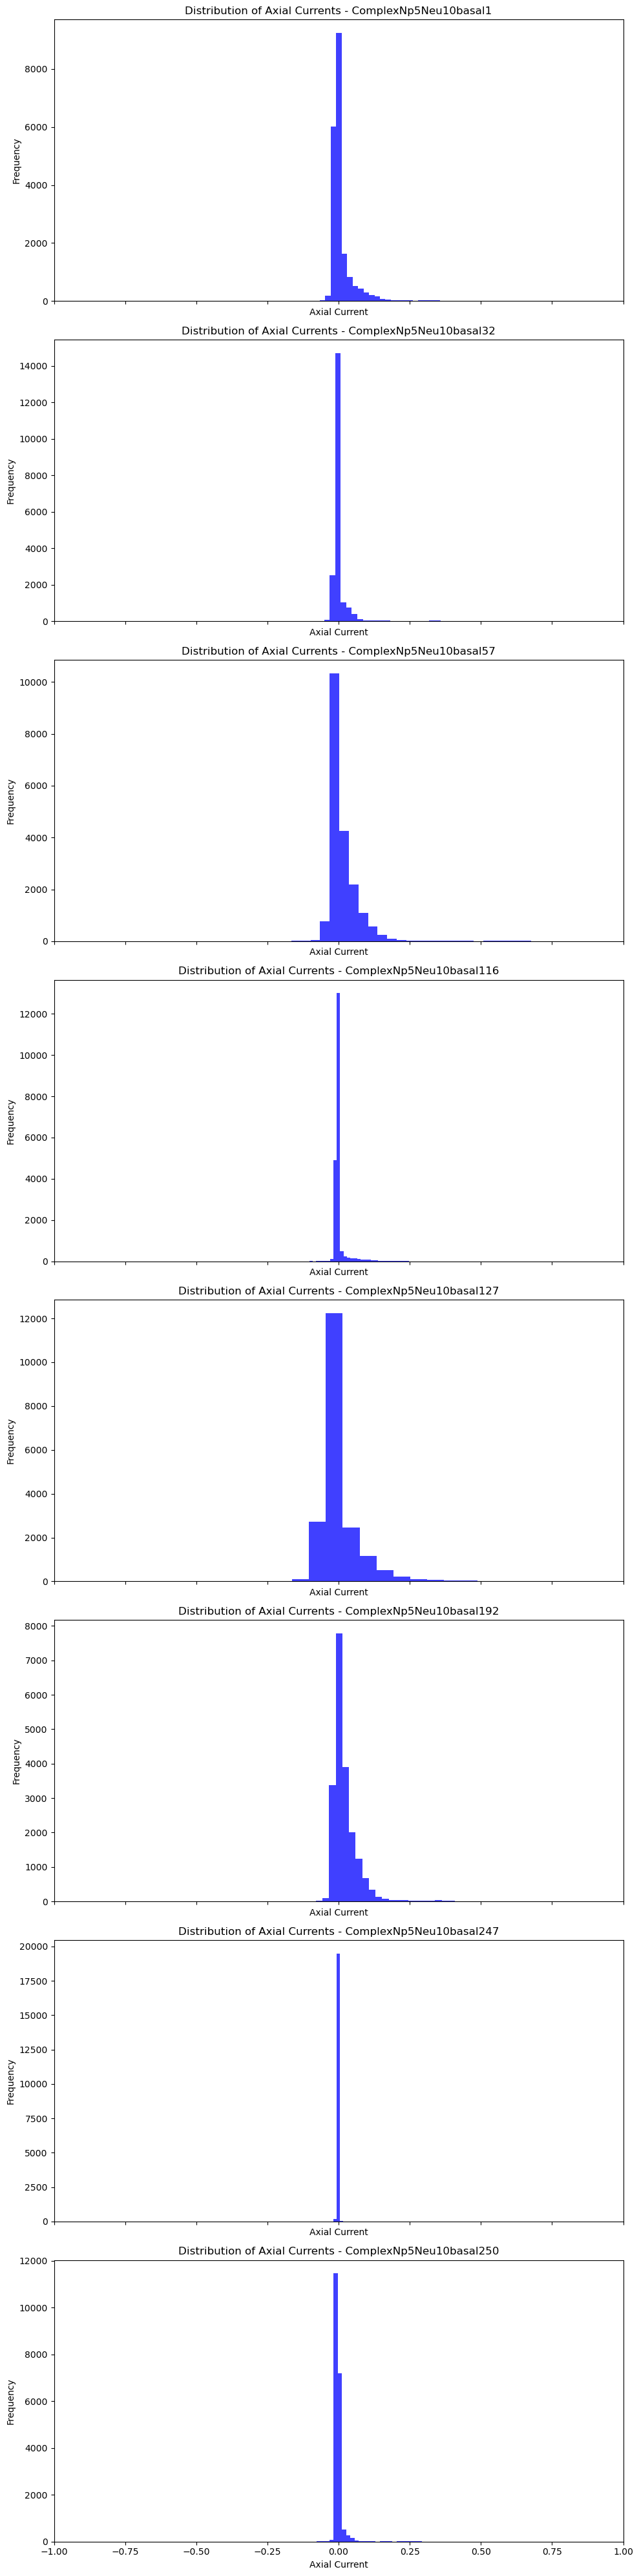

In [12]:
import matplotlib.pyplot as plt
def plot_ac_distributions(ac_dict):
    num_plots = len(ac_dict)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots), sharex=True)
    
    if num_plots == 1:
        axes = [axes]
    
    for i, (label, ac_data) in enumerate(ac_dict.items()):
        ax = axes[i]
        ax.hist(ac_data, bins=100, alpha=0.75, color='blue')
        ax.set_title(f'Distribution of Axial Currents - {label}')
        ax.set_xlabel('Axial Current')
        ax.set_ylabel('Frequency')
        ax.set_xlim(-1,1)
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_ac_distributions(all_soma_basal_acs)

Continued

In [13]:
adj_matrix = np.loadtxt(os.path.join(sim_directory, "adj_matrix.txt"))

In [14]:
all_nexus_tuft_acs = {}
SOMA_INDEX = 0
SIM_TIME = 20000

for parameters in all_parameters:
    sim_directory = parameters.path
    v = DataReader.read_data(sim_directory, "v")
    adj_matrix = np.loadtxt(os.path.join(sim_directory, "adj_matrix.txt"))
    seg_data = pd.read_csv(os.path.join(sim_directory, "segment_data.csv"))
    # Compute axial currents
    ac_matrix = CurrentTrace.compute_axial_currents(v, seg_data, adj_matrix)
    
    print(parameters.sim_name)
    # get nexus axial currents
    if 'Complex' in parameters.sim_name:
        NEXUS_INDEX = 379    
    elif 'All' in parameters.sim_name: # All reduced
        NEXUS_INDEX = 39
    else:
        raise(NotImplementedError)
    
    # Find indexes of apical branches (= nexus's children)
    apical_branches = np.where(adj_matrix[NEXUS_INDEX, :] == 1)[0]
    for apical_branch in apical_branches:
        ac = ac_matrix[NEXUS_INDEX, apical_branch]
        all_nexus_tuft_acs[str(parameters.sim_name)+'tuft'+str(apical_branch)] = ac
        ac_diff = np.diff(ac)
        np.mean(ac), np.std(ac)

ComplexNp5Neu10
AllNp5Neu10
ComplexNp10Neu10
AllNp10Neu10
ComplexNp5Neu100
AllNp5Neu100
ComplexNp10Neu100
AllNp10Neu100


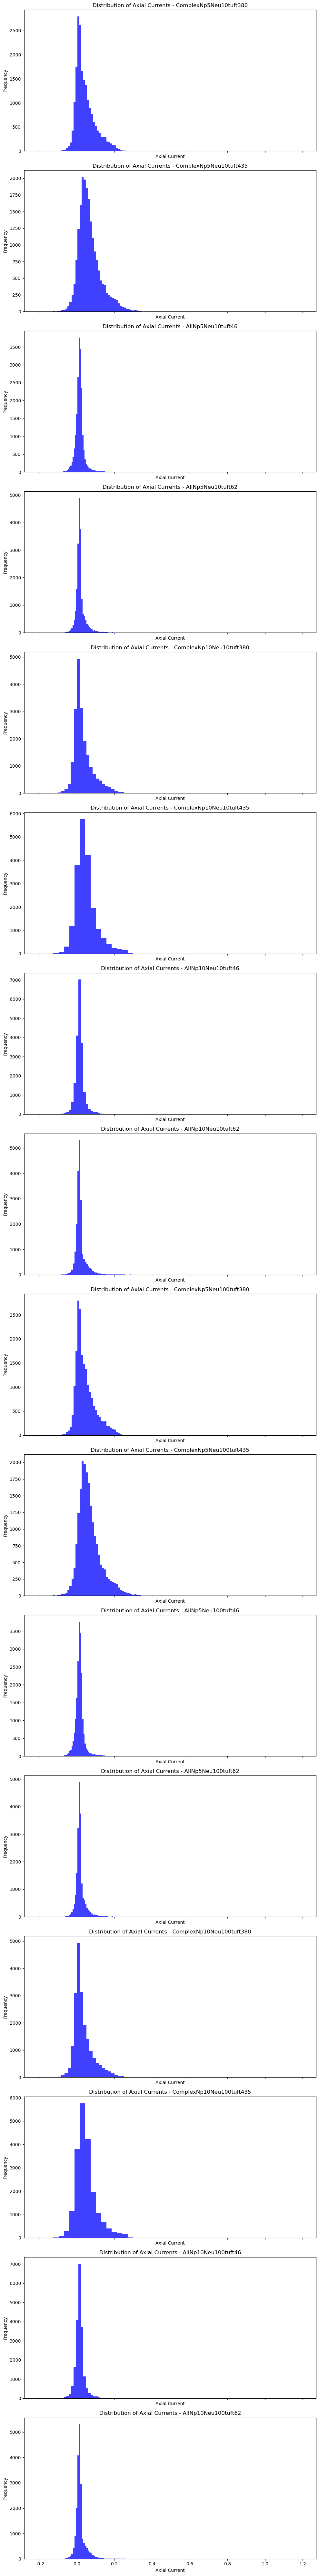

In [15]:
def plot_ac_distributions(ac_dict):
    num_plots = len(ac_dict)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots), sharex=True)
    
    if num_plots == 1:
        axes = [axes]
    
    for i, (label, ac_data) in enumerate(ac_dict.items()):
        ax = axes[i]
        ax.hist(ac_data, bins=50, alpha=0.75, color='blue')
        ax.set_title(f'Distribution of Axial Currents - {label}')
        ax.set_xlabel('Axial Current')
        ax.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_ac_distributions(all_nexus_tuft_acs)

In [16]:
apical_branches

array([46, 62])

In [17]:
seg_data[seg_data['Unnamed: 0']==46]

,Unnamed: 0,section,idx_in_section_type,seg_half_seg_RA,L,seg,pseg,p0_0,p0_1,p0_2,pc_0,pc_1,pc_2,p1_0,p1_1,p1_2,r,dl_0,dl_1,dl_2
46,46,apic,109,16.58714,71.262655,New.apic[109](0.03125),L5PCtemplate[0].apic[36](1),18.73,594.349976,-57.02,19.061292,629.868217,-54.202868,19.392584,665.386459,-51.385736,0.826904,0.662584,71.036484,5.634264


In [18]:
seg_data = pd.read_csv(os.path.join(all_parameters[0].path, "segment_data.csv"))

In [19]:
seg_data

,Unnamed: 0,section,idx_in_section_type,seg_half_seg_RA,L,seg,pseg,p0_0,p0_1,p0_2,pc_0,pc_1,pc_2,p1_0,p1_1,p1_2,r,dl_0,dl_1,dl_2
0,0,soma,0,0.081276,23.169408,L5PCtemplate[0].soma[0](0.5),NaN,34.163383,17.621527,-50.250000,45.725557,18.343678,-50.250000,57.287731,19.065830,-50.250000,6.735759,23.124348,1.444304,0.000000
1,1,dend,0,11.613729,24.200878,L5PCtemplate[0].dend[0](0.5),L5PCtemplate[0].soma[0](0.5),56.410000,20.230000,-50.250000,66.929149,21.040891,-51.991813,74.669998,18.980000,-44.580002,0.575890,18.259998,-1.250000,5.669998
2,2,dend,1,12.481000,15.182196,L5PCtemplate[0].dend[1](0.5),L5PCtemplate[0].dend[0](1),74.669998,18.980000,-44.580002,81.006490,20.137203,-40.647341,86.410004,19.889999,-44.299999,0.440000,11.740005,0.910000,0.280003
3,3,dend,2,40.998838,21.664436,L5PCtemplate[0].dend[2](0.0714286),L5PCtemplate[0].dend[1](1),86.410004,19.889999,-44.299999,90.681093,29.229828,-42.193912,97.425447,34.349242,-43.191081,0.290000,11.015444,14.459242,1.108918
4,4,dend,2,40.998838,21.664436,L5PCtemplate[0].dend[2](0.214286),L5PCtemplate[0].dend[2](0.0714286),97.425447,34.349242,-43.191081,103.477198,41.394572,-39.099386,109.921768,46.800488,-33.371367,0.290000,12.496321,12.451246,9.819714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,638,apic,107,68.313290,36.097826,L5PCtemplate[0].apic[107](0.5),L5PCtemplate[0].apic[106](1),0.560000,77.519997,-80.519997,-7.431871,82.768745,-94.260966,-16.950001,89.360001,-106.199997,0.290000,-17.510001,11.840004,-25.680000
639,639,apic,108,56.914820,30.074693,L5PCtemplate[0].apic[108](0.5),L5PCtemplate[0].apic[106](1),0.560000,77.519997,-80.519997,-6.608136,72.501664,-89.272675,-13.740000,68.550003,-101.199997,0.290000,-14.300000,-8.969994,-20.680000
640,640,axon,0,12.732396,20.000001,L5PCtemplate[0].axon[0](0.166667),L5PCtemplate[0].soma[0](0.5),45.725559,18.343678,-50.250000,45.725559,28.343678,-50.250000,45.725559,38.343679,-50.250000,0.500000,0.000000,20.000001,0.000000
641,641,axon,0,12.732396,20.000001,L5PCtemplate[0].axon[0](0.5),L5PCtemplate[0].axon[0](0.166667),45.725559,38.343679,-50.250000,45.725559,48.343679,-50.250000,45.725559,58.343680,-50.250000,0.500000,0.000000,20.000001,0.000000


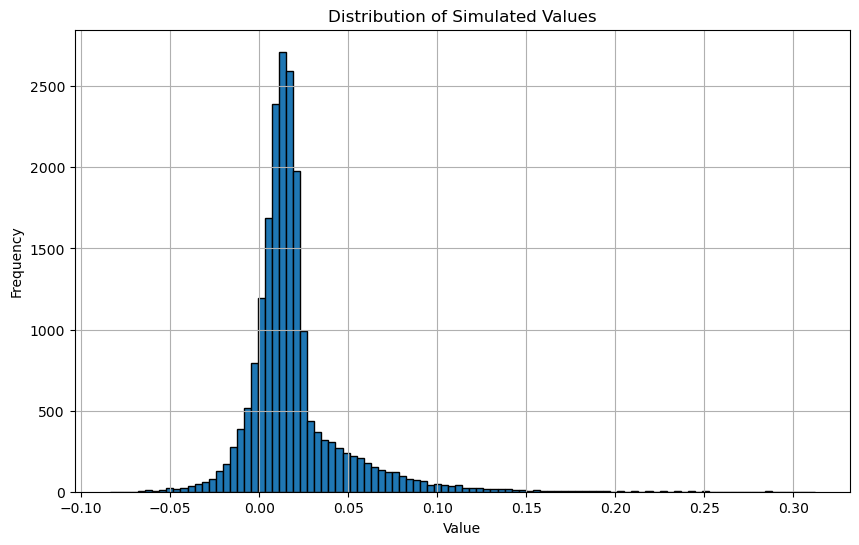

In [20]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(ac, bins=100, edgecolor='black')
plt.title('Distribution of Simulated Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [47]:
import numpy as np

# Initialize dictionaries to store stats for each tuft ID
complex_means = {}
reduced_means = {}
complex_stds = {}
reduced_stds = {}

# Process each key in the data
for key in all_nexus_tuft_acs.keys():
    # Extract the tuft ID
    tuft_id = key.split('tuft')[-1]
    
    # Initialize dictionaries for each tuft ID if they don't already exist
    if tuft_id not in complex_means:
        complex_means[tuft_id] = []
        complex_stds[tuft_id] = []
        reduced_means[tuft_id] = []
        reduced_stds[tuft_id] = []
    
    # Append means and stds to the respective lists based on the key type
    if 'Complex' in key:
        complex_means[tuft_id].append(np.mean(all_nexus_tuft_acs[key]))
        complex_stds[tuft_id].append(np.std(all_nexus_tuft_acs[key]))
    elif 'All' in key:
        reduced_means[tuft_id].append(np.mean(all_nexus_tuft_acs[key]))
        reduced_stds[tuft_id].append(np.std(all_nexus_tuft_acs[key]))
    else:
        raise NotImplementedError

# Print stats for each tuft ID
for tuft_id in complex_means.keys():
    if complex_means[tuft_id] and not any(np.isnan(complex_means[tuft_id])):
        print(f'Complex tuft ID: {tuft_id}')
        print(f'Complex means mean: {np.mean(complex_means[tuft_id]):.3f}, std: {np.std(complex_means[tuft_id]):.3f}')
        print(f'Complex stds mean: {np.mean(complex_stds[tuft_id]):.3f}, std: {np.std(complex_stds[tuft_id]):.3f}')
    if reduced_means[tuft_id] and not any(np.isnan(reduced_means[tuft_id])):
        print(f'Reduced tuft ID: {tuft_id}')
        print(f'Reduced means mean: {np.mean(reduced_means[tuft_id]):.3f}, std: {np.std(reduced_means[tuft_id]):.3f}')
        print(f'Reduced stds: mean: {np.mean(reduced_stds[tuft_id]):.3f}, std: {np.std(reduced_stds[tuft_id]):.3f}')
    print()  # Add a blank line for readability


Complex tuft ID: 380
Complex means mean: 0.039, std: 0.006
Complex stds mean: 0.052, std: 0.000

Complex tuft ID: 435
Complex means mean: 0.058, std: 0.009
Complex stds mean: 0.059, std: 0.001

Reduced tuft ID: 46
Reduced means mean: 0.016, std: 0.000
Reduced stds: mean: 0.026, std: 0.000

Reduced tuft ID: 62
Reduced means mean: 0.019, std: 0.000
Reduced stds: mean: 0.027, std: 0.001



In [51]:
all_nexus_tuft_acs

{'ComplexNp5Neu10tuft380': array([-0.        ,  0.04508142,  0.07118916, ...,  0.12666408,
         0.13986671,  0.16088658]),
 'ComplexNp5Neu10tuft435': array([-0.        ,  0.04994554,  0.0812186 , ...,  0.1961316 ,
         0.20206339,  0.21772055]),
 'AllNp5Neu10tuft46': array([-0.        ,  0.0512106 ,  0.07345443, ...,  0.02858442,
         0.022098  ,  0.01148776]),
 'AllNp5Neu10tuft62': array([-0.        ,  0.04244021,  0.06856996, ...,  0.00336845,
        -0.00041378, -0.00741446]),
 'ComplexNp10Neu10tuft380': array([-0.        ,  0.04508142,  0.07118933, ...,  0.16919119,
         0.17118748,  0.16982662]),
 'ComplexNp10Neu10tuft435': array([-0.        ,  0.04994554,  0.08121656, ...,  0.04329552,
         0.04989422,  0.05733693]),
 'AllNp10Neu10tuft46': array([-0.        ,  0.0512106 ,  0.07345443, ..., -0.00997817,
        -0.00840873, -0.00642277]),
 'AllNp10Neu10tuft62': array([-0.        ,  0.04244021,  0.06856996, ...,  0.08546905,
         0.07968011,  0.07303167]),


In [53]:
complex_means

{'380': [0.04450911186886316,
  0.033423063657148123,
  0.04450911186886316,
  0.033423063657148123],
 '435': [0.0674777167417645,
  0.04879908318482398,
  0.0674777167417645,
  0.04879908318482398],
 '46': [],
 '62': []}

In [52]:
complex_stds

{'380': [0.05275803069579138,
  0.0518927778114368,
  0.05275803069579138,
  0.0518927778114368],
 '435': [0.0601686426822878,
  0.05804561915702696,
  0.0601686426822878,
  0.05804561915702696],
 '46': [],
 '62': []}

In [54]:
all_mean_stds = []
for key,item in complex_means.items():
    mean_std = (np.round(np.mean(item), 5), np.round(np.mean(complex_stds[key]), 5))
    all_mean_stds.append(mean_std)

/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/drfrbc/miniconda3/envs/sim_env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [55]:
all_mean_stds

[(0.03897, 0.05233), (0.05814, 0.05911), (nan, nan), (nan, nan)]